# Bank Customer Churn Prediction

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing the dataset
df=pd.read_csv("C:\\Users\\91789\\OneDrive\\Desktop\\customer_churn_data.csv")
df


,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [5]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [6]:
df.shape

(2000, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [8]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [9]:
df.describe(include=object)

,phone_no,gender,multi_screen,mail_subscribed
count,2000,1976,2000,2000
unique,2000,2,2,2
top,409-8743,Male,no,no
freq,1,1053,1802,1430


In [10]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [11]:
df.isnull()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


<AxesSubplot:>

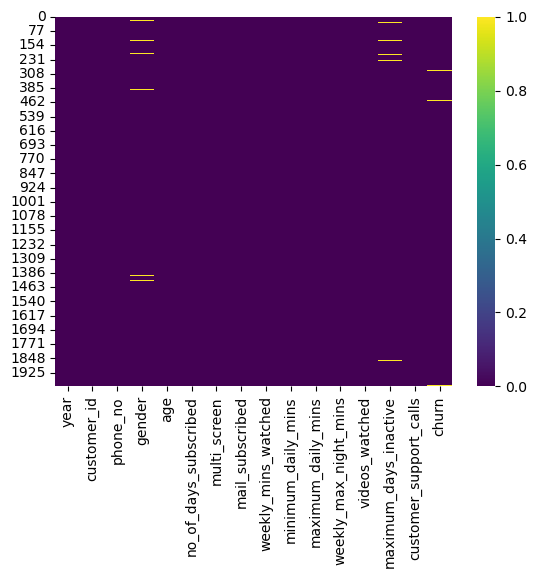

In [12]:
sns.heatmap(df.isnull(), cmap='viridis')

<AxesSubplot:>

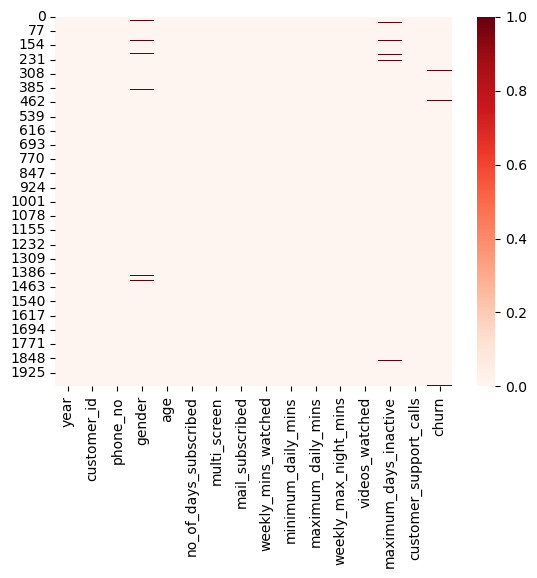

In [13]:
sns.heatmap(df.isnull(), cmap='Reds')

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [15]:
df[df.duplicated()]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


In [16]:
df['customer_id'].duplicatedicated()

AttributeError: 'Series' object has no attribute 'duplicatedicated'

In [17]:
df[df['customer_id'].duplicated()]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
918,2015,530490,392-8905,Male,36,172,no,no,323.55,7.1,36.67,83,1,2.0,3,0.0


In [18]:
df.query("customer_id == 530490")

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
917,2015,530490,343-7242,Female,34,59,no,yes,199.65,6.8,22.63,103,3,2.0,1,0.0
918,2015,530490,392-8905,Male,36,172,no,no,323.55,7.1,36.67,83,1,2.0,3,0.0


In [19]:
df.gender.unique()

array(['Female', nan, 'Male'], dtype=object)

In [20]:
df['gender'].value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [21]:
df['gender'].value_counts().sum()

1976

In [22]:
df['gender'].notnull().sum()

1976

In [23]:
df['gender'].isnull().sum()

24

In [24]:
df['gender'].value_counts(dropna=False)

Male      1053
Female     923
NaN         24
Name: gender, dtype: int64

In [25]:
df['gender'].value_counts(dropna=False).sum()

2000

In [26]:
df['gender'].value_counts(dropna=False) / len(df) * 100

Male      52.65
Female    46.15
NaN        1.20
Name: gender, dtype: float64

In [27]:
df['gender'].value_counts(dropna=False, normalize=True) * 100

Male      52.65
Female    46.15
NaN        1.20
Name: gender, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

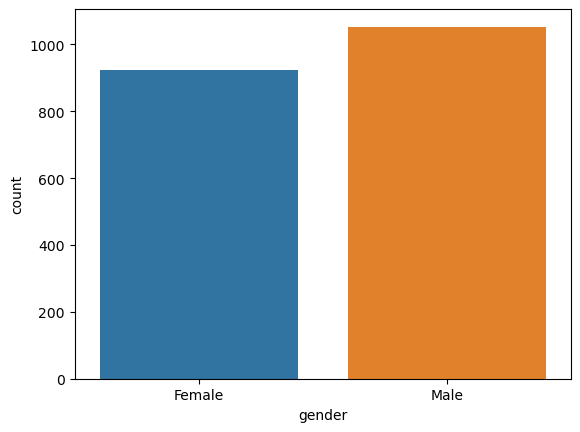

In [28]:
sns.countplot(x='gender', data=df)

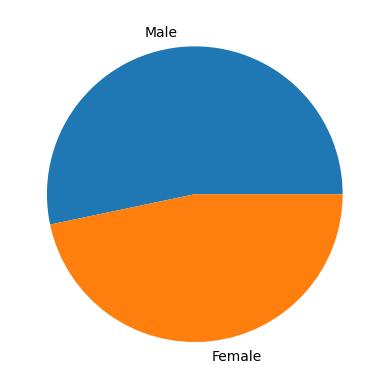

In [29]:
plt.pie(df['gender'].value_counts(), labels=['Male', 'Female'])
plt.show()

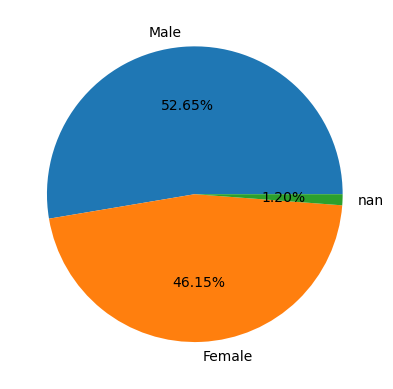

In [30]:
plt.pie(df['gender'].value_counts(dropna=False), 
        labels=df['gender'].value_counts(dropna=False).index, autopct='%.2f%%')
plt.show()

In [31]:
help(df['gender'].value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True) method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
  

In [32]:
df['gender'].value_counts(dropna=False).index

Index(['Male', 'Female', nan], dtype='object')

In [33]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


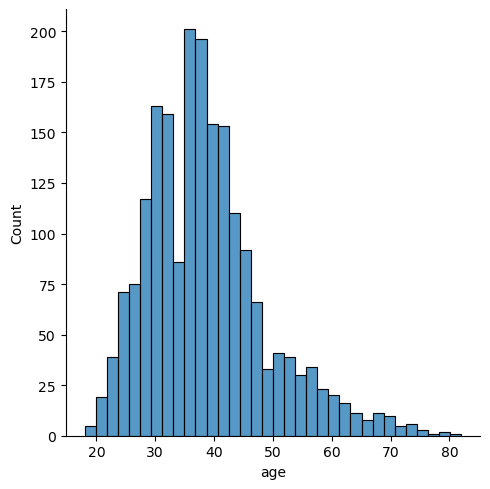

In [34]:
sns.displot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

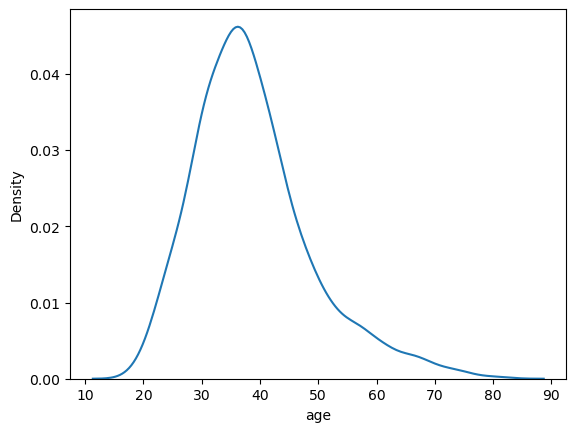

In [35]:
sns.kdeplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

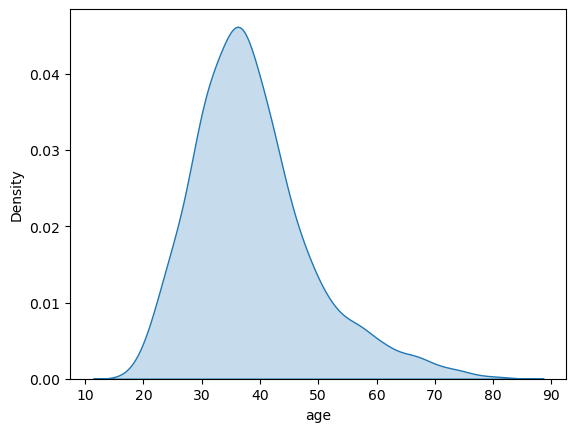

In [36]:
sns.kdeplot(df['age'], shade=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

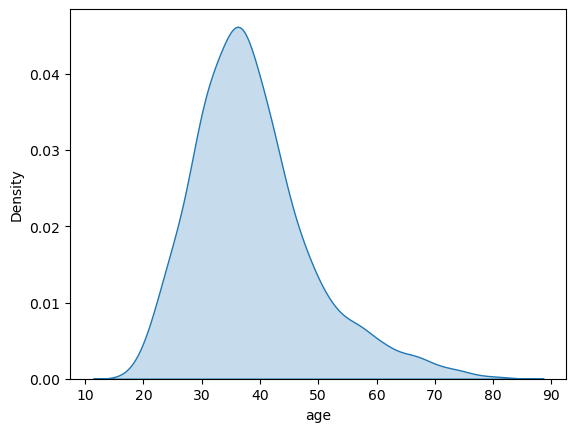

In [37]:
sns.kdeplot(df['age'], fill=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

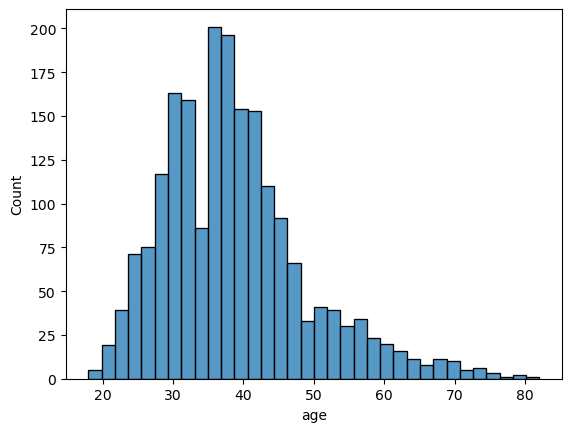

In [38]:
sns.histplot(df['age'])

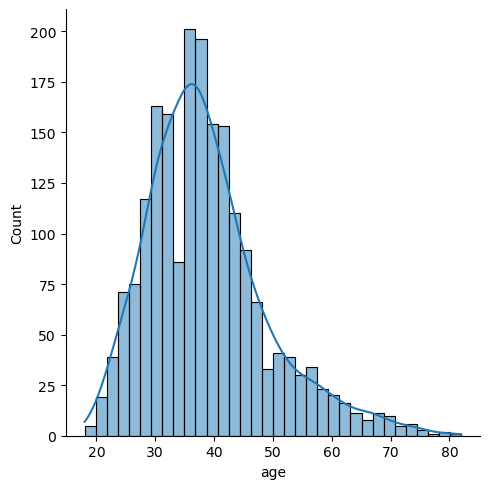

In [39]:
sns.displot(df['age'], kde=True)

In [40]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [41]:
df.nunique()

year                         1
customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

<AxesSubplot:xlabel='no_of_days_subscribed', ylabel='Density'>

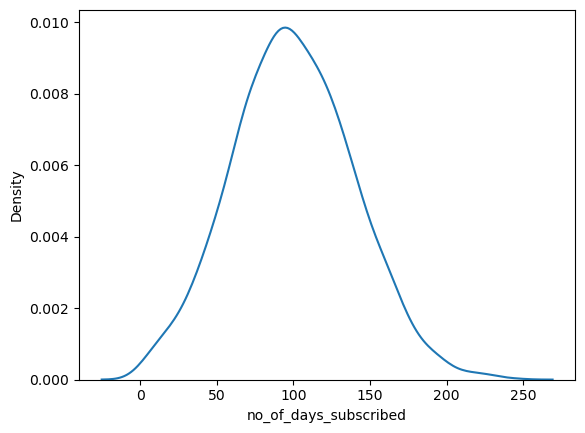

In [42]:
sns.kdeplot(df.no_of_days_subscribed)

<AxesSubplot:xlabel='maximum_daily_mins', ylabel='Density'>

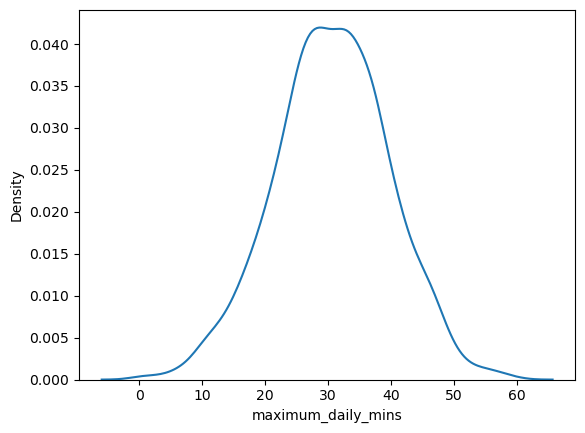

In [43]:
sns.kdeplot(df.maximum_daily_mins)

<AxesSubplot:xlabel='maximum_daily_mins', ylabel='minimum_daily_mins'>

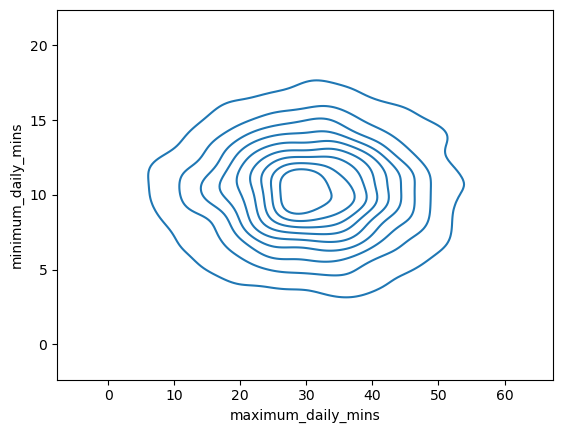

In [44]:
sns.kdeplot(x=df.maximum_daily_mins, y=df.minimum_daily_mins)

<AxesSubplot:xlabel='maximum_daily_mins', ylabel='Density'>

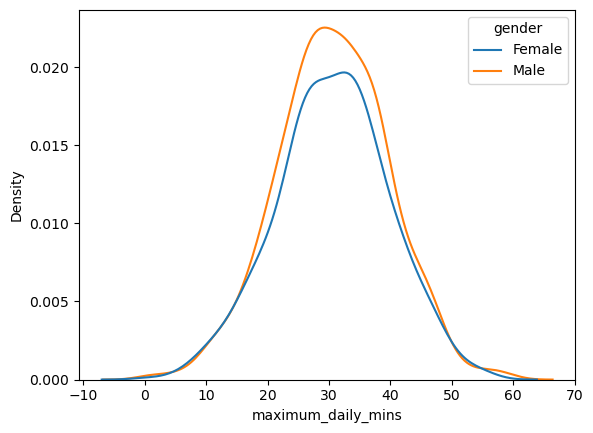

In [45]:
sns.kdeplot(df.maximum_daily_mins, hue=df.gender)

In [46]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


<AxesSubplot:ylabel='no_of_days_subscribed'>

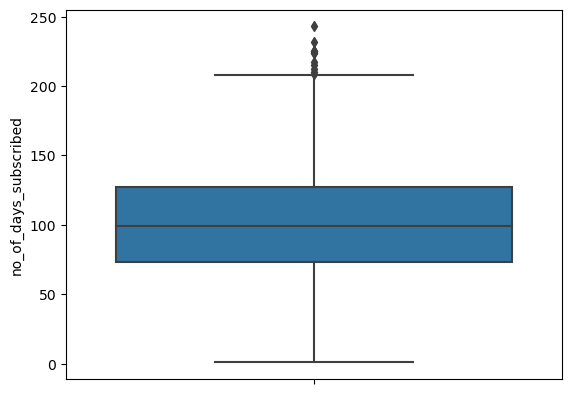

In [47]:
sns.boxplot(y=df.no_of_days_subscribed)

<AxesSubplot:ylabel='no_of_days_subscribed'>

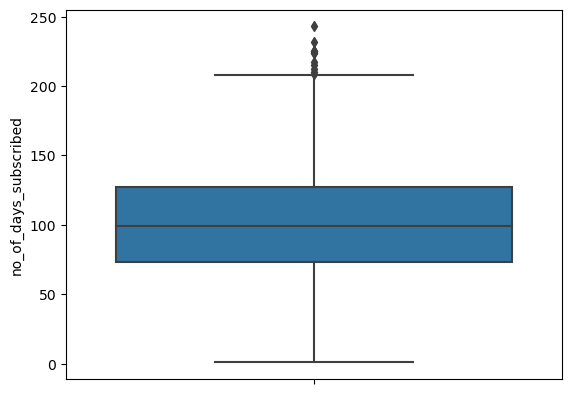

In [48]:
sns.boxplot(y=df.no_of_days_subscribed, hue=df.gender)

<AxesSubplot:ylabel='no_of_days_subscribed'>

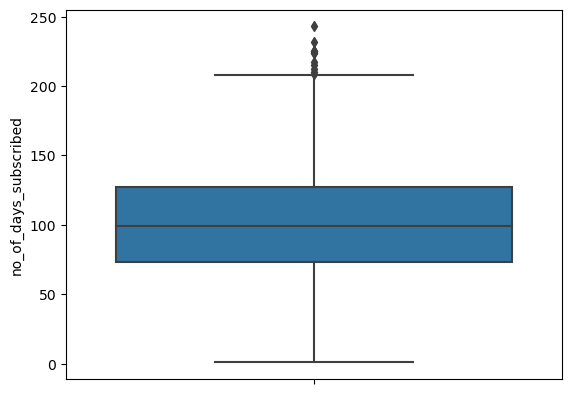

In [49]:
sns.boxplot(y=df.no_of_days_subscribed, hue=df['gender'])

<AxesSubplot:ylabel='no_of_days_subscribed'>

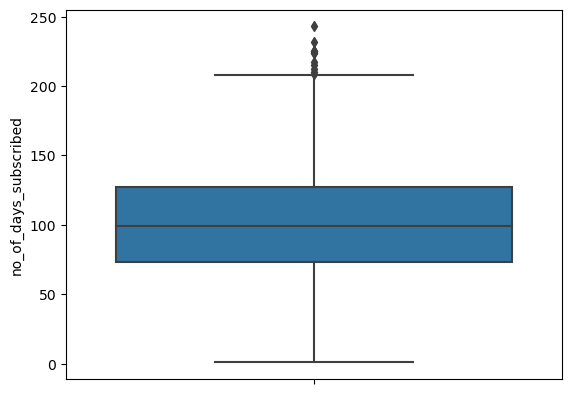

In [50]:
sns.boxplot(y=df.no_of_days_subscribed, hue=df['churn'])

<AxesSubplot:ylabel='age'>

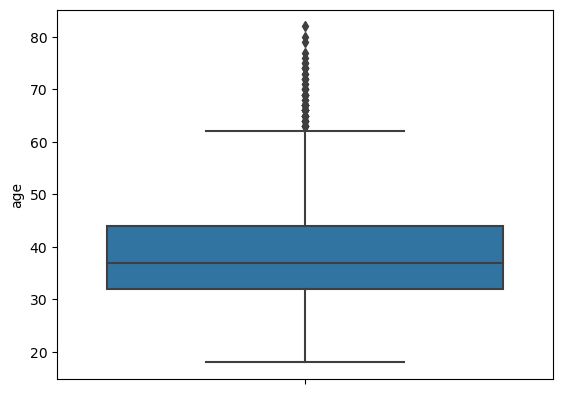

In [51]:
sns.boxplot(y=df.age, hue=df['churn'])

<AxesSubplot:xlabel='churn', ylabel='no_of_days_subscribed'>

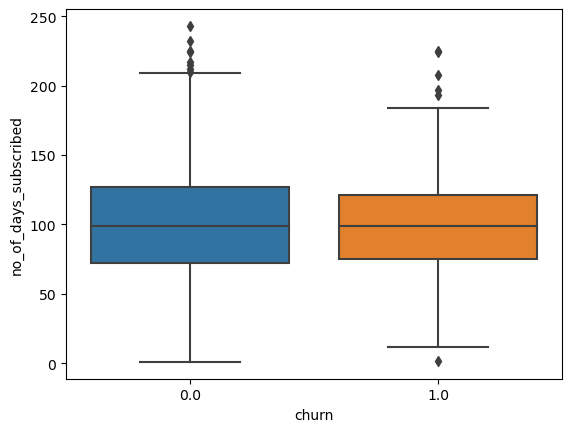

In [52]:
sns.boxplot(x=df['churn'], y=df.no_of_days_subscribed, data=df)

<AxesSubplot:xlabel='churn', ylabel='no_of_days_subscribed'>

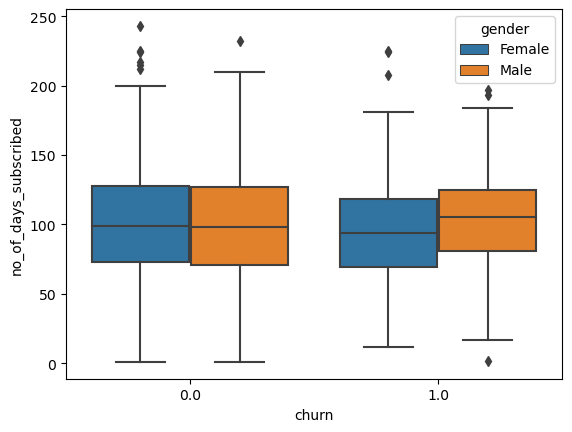

In [53]:
sns.boxplot(x=df['churn'], y=df.no_of_days_subscribed, data=df, hue='gender')

<AxesSubplot:ylabel='videos_watched'>

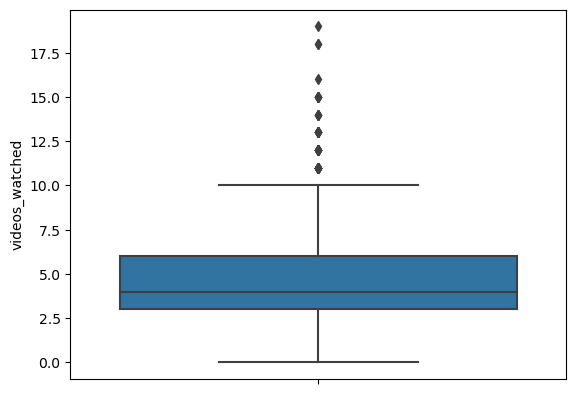

In [54]:
sns.boxplot(y=df.videos_watched)

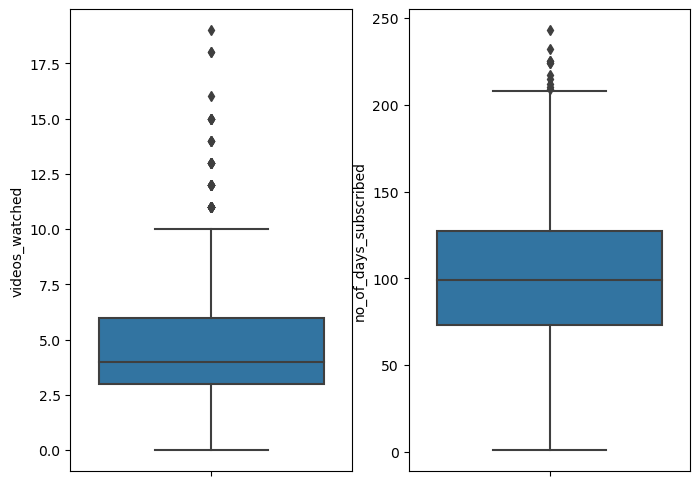

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6), dpi=100)
sns.boxplot(y=df.videos_watched, ax=ax[0])
sns.boxplot(y=df.no_of_days_subscribed, ax=ax[1])
plt.show()

In [56]:
ax

array([<AxesSubplot:ylabel='videos_watched'>,
       <AxesSubplot:ylabel='no_of_days_subscribed'>], dtype=object)

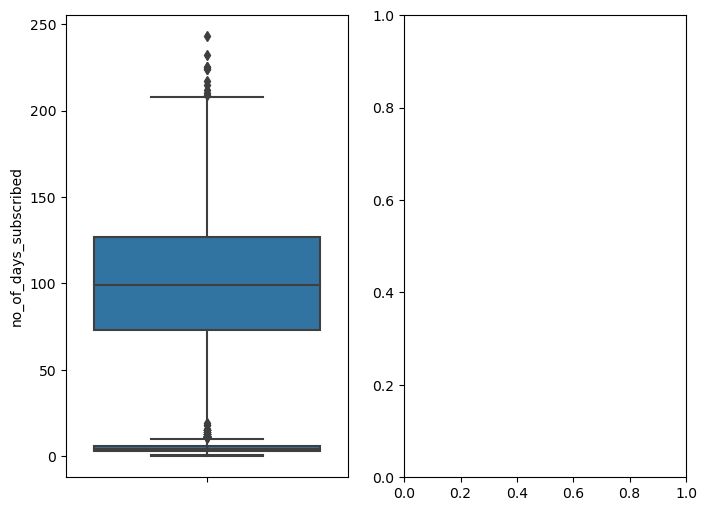

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6), dpi=100)
sns.boxplot(y=df.videos_watched, ax=ax[0])
sns.boxplot(y=df.no_of_days_subscribed, ax=ax[0])
plt.show()

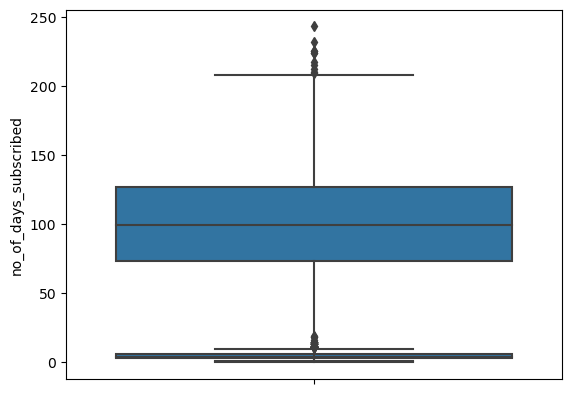

In [58]:
fig, ax = plt.subplots()
sns.boxplot(y=df.videos_watched, ax=ax)
sns.boxplot(y=df.no_of_days_subscribed, ax=ax)
plt.show()

In [59]:
df[df.duplicated()].count()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [60]:
df_duplicates = df.iloc[500:550]

In [61]:
df_duplicates.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
500,2015,328695,366-5918,Male,42,74,no,no,300.60,10.0,34.07,118,2,3.0,1,0.0
501,2015,329105,346-3445,Male,39,163,no,yes,329.40,13.8,37.33,88,8,4.0,2,0.0
502,2015,329544,379-8526,Male,45,118,no,no,379.80,9.7,43.04,108,7,3.0,2,0.0
503,2015,330007,366-3358,Male,45,98,no,no,407.10,11.1,46.14,118,6,3.0,4,1.0
504,2015,330054,408-3384,Female,42,81,no,no,230.25,6.3,26.10,86,2,2.0,2,0.0


In [62]:
df1 = pd.concat([df, df_duplicates])

In [63]:
df1.shape

(2050, 16)

In [64]:
df1[df1.duplicated()].count()

year                      50
customer_id               50
phone_no                  50
gender                    50
age                       50
no_of_days_subscribed     50
multi_screen              50
mail_subscribed           50
weekly_mins_watched       50
minimum_daily_mins        50
maximum_daily_mins        50
weekly_max_night_mins     50
videos_watched            50
maximum_days_inactive     50
customer_support_calls    50
churn                     46
dtype: int64

In [65]:
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 500 to 549
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    50 non-null     int64  
 1   customer_id             50 non-null     int64  
 2   phone_no                50 non-null     object 
 3   gender                  50 non-null     object 
 4   age                     50 non-null     int64  
 5   no_of_days_subscribed   50 non-null     int64  
 6   multi_screen            50 non-null     object 
 7   mail_subscribed         50 non-null     object 
 8   weekly_mins_watched     50 non-null     float64
 9   minimum_daily_mins      50 non-null     float64
 10  maximum_daily_mins      50 non-null     float64
 11  weekly_max_night_mins   50 non-null     int64  
 12  videos_watched          50 non-null     int64  
 13  maximum_days_inactive   50 non-null     float64
 14  customer_support_calls  50 non-null     i

In [66]:
df1.drop_duplicates()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [67]:
df1

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2015,347172,393-4949,Female,29,43,no,no,252.60,11.1,28.63,102,2,3.0,1,0.0
546,2015,348031,417-5320,Male,34,43,no,no,345.30,9.2,39.13,100,3,3.0,0,0.0
547,2015,348226,352-6282,Female,55,107,no,yes,298.35,12.6,33.81,76,4,4.0,3,0.0
548,2015,348566,352-7413,Male,42,82,no,no,151.50,13.3,17.17,93,2,4.0,0,0.0


In [68]:
df1.drop_duplicates(inplace=True)
df1

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [69]:
df.isnull().sum() / len(df) * 100

year                      0.00
customer_id               0.00
phone_no                  0.00
gender                    1.20
age                       0.00
no_of_days_subscribed     0.00
multi_screen              0.00
mail_subscribed           0.00
weekly_mins_watched       0.00
minimum_daily_mins        0.00
maximum_daily_mins        0.00
weekly_max_night_mins     0.00
videos_watched            0.00
maximum_days_inactive     1.40
customer_support_calls    0.00
churn                     1.75
dtype: float64

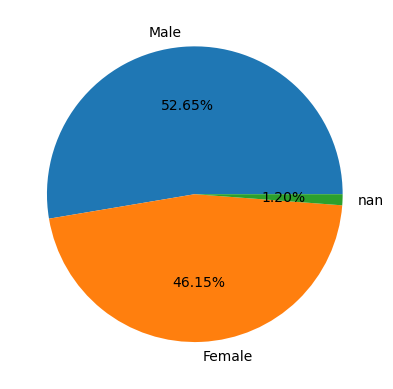

In [70]:
plt.pie(df['gender'].value_counts(dropna=False), 
        labels=df['gender'].value_counts(dropna=False).index, autopct='%.2f%%')
plt.show()

In [71]:
df['gender'].mode()

0    Male
Name: gender, dtype: object

In [72]:
df['gender'].mode()[0]

'Male'

In [73]:
df.fillna({'gender': df['gender'].mode()[0]})

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [74]:
df['gender'].value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [75]:
df['gender'].value_counts(dropna=False)

Male      1053
Female     923
NaN         24
Name: gender, dtype: int64

In [76]:
df['gender'].value_counts().idxmax()

'Male'

In [77]:
df['gender'].value_counts().max()

1053

In [78]:
df.fillna({'gender': df['gender'].value_counts().idxmax()}, inplace=True)

In [79]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

<AxesSubplot:ylabel='videos_watched'>

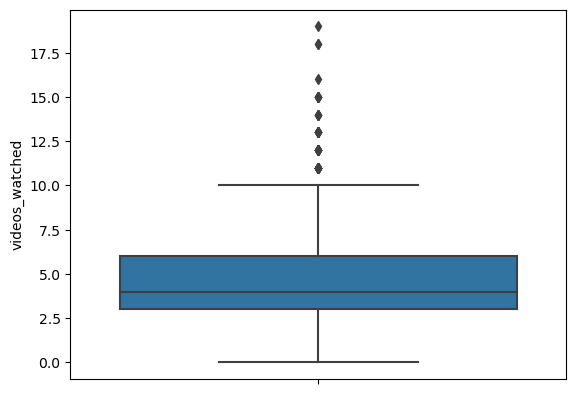

In [80]:
sns.boxplot(y=df.videos_watched)

In [81]:
lower_limit = df.videos_watched.quantile(0.04)
upper_limit = df.videos_watched.quantile(0.97)

In [82]:
lower_limit

1.0

In [83]:
upper_limit

10.0

In [84]:
np.where(df.videos_watched < lower_limit, lower_limit, 
         np.where(df.videos_watched > upper_limit, upper_limit, df.videos_watched))

array([ 1.,  3.,  1., ..., 10.,  6.,  6.])

In [85]:
lower_limit

1.0

In [86]:
upper_limit

10.0

In [87]:
df.videos_watched.clip(lower=lower_limit, upper=upper_limit)

0        1.0
1        3.0
2        1.0
3        4.0
4        7.0
        ... 
1995     5.0
1996     3.0
1997    10.0
1998     6.0
1999     6.0
Name: videos_watched, Length: 2000, dtype: float64

In [88]:
df1

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [89]:
df1['videos_watched'] = np.where(df1.videos_watched < lower_limit, lower_limit, np.where(df1.

SyntaxError: unexpected EOF while parsing (1851780073.py, line 1)

In [90]:
videos_watched > upper_limit, upper_limit, df1.videos_watched))df1['videos_watched'] = np.where(df1.videos_watched < lower_limit, lower_limit, np.where(df1.

SyntaxError: unmatched ')' (3171077992.py, line 1)

<AxesSubplot:ylabel='videos_watched'>

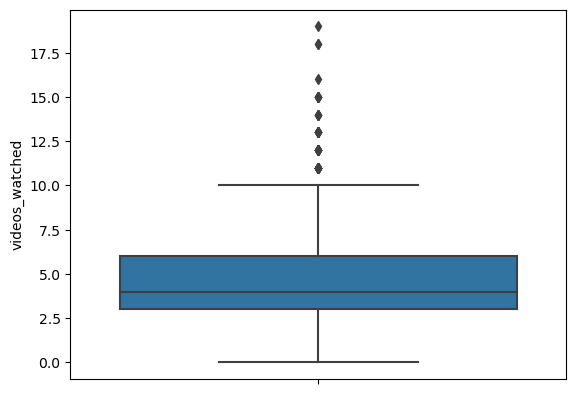

In [91]:
sns.boxplot(y=df1.videos_watched)

<AxesSubplot:ylabel='videos_watched'>

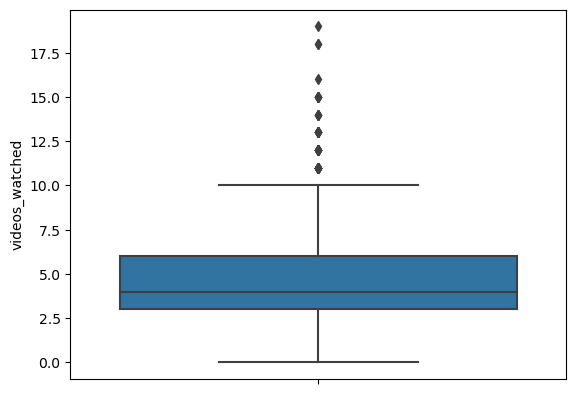

In [92]:
sns.boxplot(y=df.videos_watched)

In [93]:
df2 = df.copy()

In [94]:
id(df)

1988118532000

In [95]:
id(df2)

1988157163264

In [96]:
df2.videos_watched = df2.videos_watched.clip(lower=lower_limit, upper=upper_limit)

<AxesSubplot:ylabel='videos_watched'>

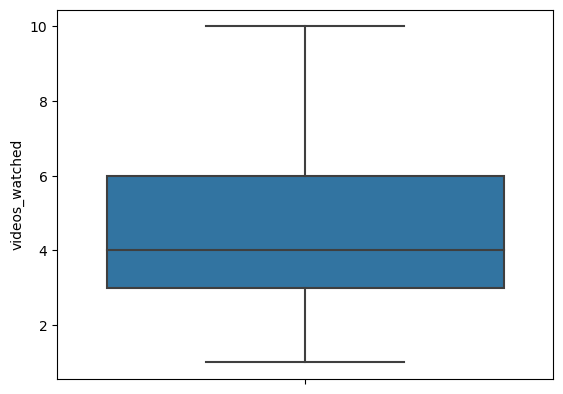

In [97]:
sns.boxplot(y=df2.videos_watched)

<AxesSubplot:ylabel='no_of_days_subscribed'>

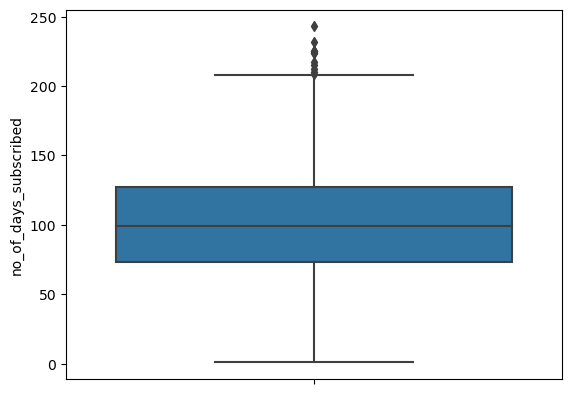

In [98]:
sns.boxplot(y=df2.no_of_days_subscribed)

In [99]:
lower_limit = df2.no_of_days_subscribed.quantile(0.04)
upper_limit = df2.no_of_days_subscribed.quantile(0.97)
df2.no_of_days_subscribed = df2.no_of_days_subscribed.clip(lower=lower_limit, upper=upper_limit)

<AxesSubplot:ylabel='no_of_days_subscribed'>

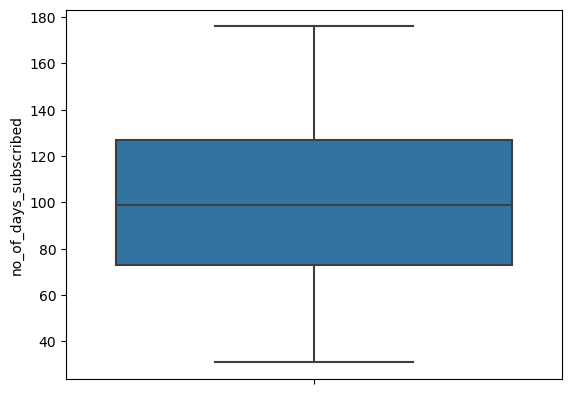

In [100]:
sns.boxplot(y=df2.no_of_days_subscribed)

In [101]:
df.videos_watched.sort_values(ascending=True)

849      0
419      0
423      0
452      0
159      0
        ..
1970    15
1997    16
369     18
1821    18
1588    19
Name: videos_watched, Length: 2000, dtype: int64

In [102]:
df.videos_watched = df.videos_watched.sort_values(ascending=True)

In [103]:
lower

NameError: name 'lower' is not defined

In [104]:
q3 = df.videos_watched.quantile(.75)
q1 = df.videos_watched.quantile(.25)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [105]:
lower

-1.5

In [106]:
upper

10.5

In [107]:
df.videos_watched.clip(lower=lower, upper=upper)

0        1.0
1        3.0
2        1.0
3        4.0
4        7.0
        ... 
1995     5.0
1996     3.0
1997    10.5
1998     6.0
1999     6.0
Name: videos_watched, Length: 2000, dtype: float64

In [108]:
df.videos_watched = df.videos_watched.clip(lower=lower, upper=upper)

<AxesSubplot:ylabel='videos_watched'>

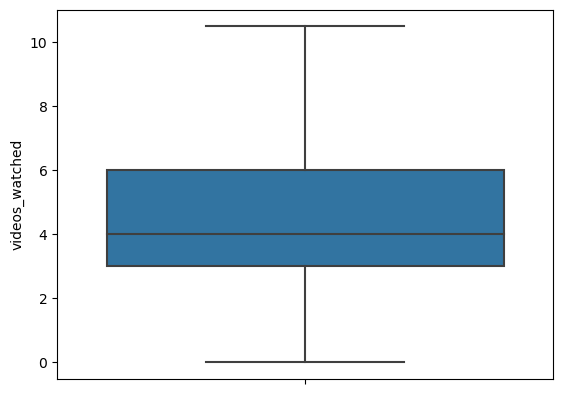

In [109]:
sns.boxplot(y=df.videos_watched)

In [110]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1.0,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3.0,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1.0,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4.0,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7.0,3.0,1,0.0


In [111]:
pd.get_dummies(df.gender)

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,0,1
1998,0,1


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  2000 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   float64
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [113]:
pd.get_dummies(df.multi_screen)

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [114]:
pd.get_dummies(df.mail_subscribed)

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1995,0,1
1996,1,0
1997,1,0
1998,1,0


In [115]:
pd.get_dummies(df.mail_subscribed, prefix='mail_subscribed')

,mail_subscribed_no,mail_subscribed_yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1995,0,1
1996,1,0
1997,1,0
1998,1,0


In [116]:
pd.get_dummies(df.multi_screen, prefix='multi_screen')

,multi_screen_no,multi_screen_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


<AxesSubplot:>

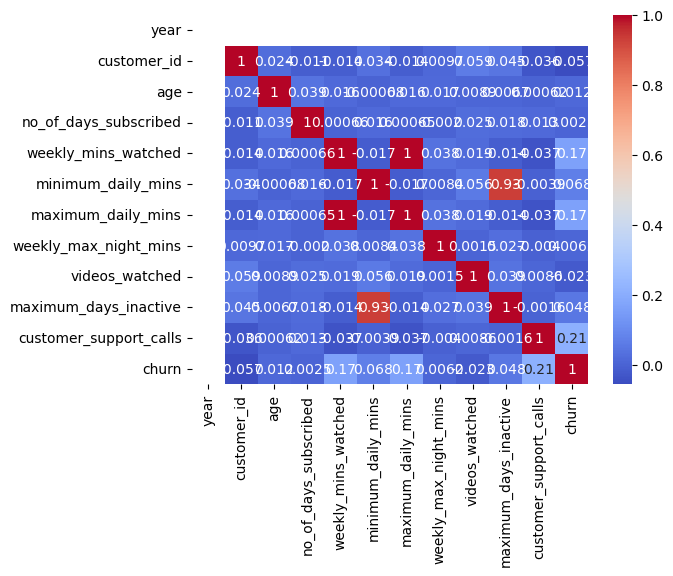

In [117]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [118]:
df.corr()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,NaN,1.000000,0.023830,-0.011457,-0.013830,0.033733,-0.013834,0.009713,0.058905,0.045145,-0.036009,-0.056777
age,NaN,0.023830,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.008902,0.006690,0.000618,0.011631
no_of_days_subscribed,NaN,-0.011457,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.024537,0.017961,0.013419,0.002528
weekly_mins_watched,NaN,-0.013830,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018693,-0.013635,-0.036848,0.165871
minimum_daily_mins,NaN,0.033733,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.055889,0.932155,-0.003943,0.067668
maximum_daily_mins,NaN,-0.013834,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018696,-0.013634,-0.036854,0.165870
weekly_max_night_mins,NaN,0.009713,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,0.001520,0.026676,-0.003965,0.006211
videos_watched,NaN,0.058905,0.008902,0.024537,0.018693,0.055889,0.018696,0.001520,1.000000,0.039369,0.008583,-0.023404
maximum_days_inactive,NaN,0.045145,0.006690,0.017961,-0.013635,0.932155,-0.013634,0.026676,0.039369,1.000000,-0.001572,0.048040
